# Boston Houses Price Estimation using Gradient Descent

**The Boston Housing dataset is a datset derived from the information collected by the U.S. Census Service concerning housing in the area of Boston Mass.**

# Importing Libraries

In [76]:
import numpy as np                  # Used for the mathematical coding
import pandas as pd                 # USed to load the data from csv form
import matplotlib.pyplot as plt     # Used for visualization

# Loading the dataset and Understanding each feature

In [77]:
# https://raw.githubusercontent.com/SumoKing69/Gradient-Descent---Boston-Dataset/main/Train_dataset.csv - for uploading 
# the dataset from github.

data = pd.read_csv(r"C:\Users\96895\Desktop\Python AI\Gradient Descent Project\BostonDataSet\Train_dataset.csv" , delimiter = ',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   # CRIM    379 non-null    float64
 1    ZN       379 non-null    float64
 2    INDUS    379 non-null    float64
 3    CHAS     379 non-null    float64
 4    NOX      379 non-null    float64
 5    RM       379 non-null    float64
 6    AGE      379 non-null    float64
 7    DIS      379 non-null    float64
 8    RAD      379 non-null    float64
 9    TAX      379 non-null    float64
 10   PTRATIO  379 non-null    float64
 11   B        379 non-null    float64
 12   LSTAT    379 non-null    float64
 13   Y        379 non-null    float64
dtypes: float64(14)
memory usage: 41.6 KB


**As there aren't any null values in any of the columns, we don't need to perform any data cleaning actions.**

**In the dataset, there are 14 columns and 379 entries i.e we have 13 features and 379 houses in boston , to which we need to predict the future prices. (13 features because 'Y' is the target / Price column.)**

Short Information on each column:
1) **CRIM** : per capita crime rate by town. 

2) **ZN** : proportion of residential land zoned for lots over 25,000 sq.ft.

3) **INDUS** : proportion of non-retail business acres per town.

4) **CHAS** : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

5) **NOX** : nitric oxides concentration (parts per 10 million).

6) **RM** : average number of rooms per dwelling.

7) **AGE** : proportion of owner-occupied units built prior to 1940.

8) **DIS** : weighted distances to five Boston employment centres.

9) **RAD** : index of accessibility to radial highways.

10) **TAX** : full-value property-tax rate per $10,000.

11) **PTRATIO** : pupil-teacher ratio by town.

12) **B** : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks (people of African American descent) by town.

13) **LSTAT** : % lower status of the population

In [78]:
data.describe()

,# CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.019628,0.002455,0.036170,0.028955,0.028775,0.032202,0.038395,-0.001288,0.043307,0.043786,0.019218,-0.015785,0.018418,22.609499
std,1.067490,1.000813,1.017497,1.048995,0.999656,1.001174,0.985209,1.027803,1.016265,1.019974,1.000296,1.015797,1.015377,9.389647
min,-0.417713,-0.487722,-1.516987,-0.272599,-1.465882,-3.880249,-2.335437,-1.267069,-0.982843,-1.313990,-2.707379,-3.883072,-1.531127,5.000000
25%,-0.408171,-0.487722,-0.867691,-0.272599,-0.878475,-0.571480,-0.768994,-0.829872,-0.637962,-0.755697,-0.488039,0.197588,-0.828856,16.700000
50%,-0.383729,-0.487722,-0.180458,-0.272599,-0.144217,-0.103479,0.338718,-0.329213,-0.523001,-0.440915,0.297977,0.374827,-0.161629,21.100000
75%,0.055208,0.156071,1.015999,-0.272599,0.628913,0.529069,0.911243,0.674172,1.661245,1.530926,0.806576,0.429868,0.647173,25.750000
max,9.941735,3.804234,2.422565,3.668398,2.732346,3.555044,1.117494,3.960518,1.661245,1.798194,1.638828,0.441052,3.409999,50.000000


# Implementing Gradient Descent

In [79]:
# Cost of each step
def cost(x , y , m):
    tot_cost = 0
    N = x.shape[0]
    for i in range(N):
        tot_cost += (1/N) * ((y[i] - (m*x[i]).sum())**2)
    return tot_cost

In [80]:
# Iterating through entire data set
def step_gradient(x , y , lrate , m):
    slopes = np.zeros(x.shape[1])
    N = x.shape[0]
    M = x.shape[1]
    for i in range(N):
        for j in range(M):
            slopes[j] += (-2/N) * (y[i] - (m*x[i]).sum())*(x[i][j])
    
    m = m - (lrate * slopes)
    return m

In [81]:
# The important Auxillary function 
def run(x_train , y_train):
    m = np.zeros(x_train.shape[1])
    learning_rate = 0.155
    iterations = 100
    cost_arr = np.zeros(iterations)
    for i in range(iterations):
        m = step_gradient(x_train , y_train , learning_rate , m)
        cost_arr[i] = cost(x_train,y_train,m)
        # print("Cost of ", i+1,"th step is: ",cost_arr[i])     --> To check whether we overshoot or the opposite.
    return (m,cost_arr)

In [82]:
# A predicting function
def predict(x , m):
    y = []
    N = x.shape[0]
    for i in range(N):
        ans = (x[i]*m).sum()
        y.append(ans)
    return np.array(y)

In [83]:
# Modifying the data for GD model
data['Val_C'] = 1
data['Target'] = data.iloc[:,13]                   # Done for the value of c
data = data.drop(data.columns[13] , axis = 1)  
x_train = data.iloc[: , 0:14]
y_train = data.iloc[: , 14]
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1,1)
m_train = np.zeros(x_train.shape[1])
m_train , cost_arr = run(x_train , y_train)

In [84]:
# Loading the test data and saving the predictions
# https://raw.githubusercontent.com/SumoKing69/Gradient-Descent---Boston-Dataset/main/Test_dataset.csv - for uploading 
# the dataset from github.

data2 = pd.read_csv(r"C:\Users\96895\Desktop\Python AI\Gradient Descent Project\BostonDataSet\Test_dataset.csv" , delimiter = ',' , header = None)
data2['Val_C'] = 1                              # Done for the value of c 
x_pred = np.array(data2)
y_pred = predict(x_pred , m_train)

# We can also use numpy for saving the csv file.
pd.DataFrame(y_pred).to_csv(r"C:\Users\96895\Desktop\Python AI\Gradient Descent Project\BostonDataSet\Predictions2.csv" , index = False)

# Data Visualization

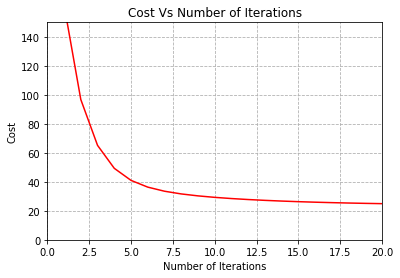

In [85]:
plt.plot(np.arange(len(cost_arr)), cost_arr, color = 'red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Vs Number of Iterations')
plt.grid(ls = '--')
plt.axis([0,20, 0, 150])

plt.show()